# Set up Google Colab notebook environment

Download the python project from the drive and unzip it

In [ ]:
import os
import sys
import random
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

On Data augmentation: https://fairyonice.github.io/Learn-about-ImageDataGenerator.html

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#%rm -rf "./data"
#%rm -rf "./files_df.csv"

In [ ]:
%rm -rf "./src"
%rm -rf "./__MACOSX"

In [ ]:
!unzip "gdrive/MyDrive/Colab Notebooks/src.zip"

Archive:  gdrive/MyDrive/Colab Notebooks/src.zip
   creating: src/
  inflating: __MACOSX/._src          
  inflating: src/.DS_Store           
  inflating: __MACOSX/src/._.DS_Store  
  inflating: src/index.py            
   creating: src/models/
  inflating: __MACOSX/src/._models   
   creating: src/data_processers/
  inflating: src/main.py             
   creating: src/data_loaders/
   creating: src/models/abstract/
  inflating: src/models/.DS_Store    
  inflating: __MACOSX/src/models/._.DS_Store  
  inflating: src/models/__init__.py  
   creating: src/models/__pycache__/
  inflating: src/models/cnn.py       
   creating: src/models/saved_models/
  inflating: src/models/utils.py     
  inflating: src/models/vgg16.py     
  inflating: src/models/alexnet.py   
  inflating: src/data_processers/__init__.py  
   creating: src/data_processers/__pycache__/
  inflating: src/data_processers/data_processer.py  
  inflating: src/data_loaders/__init__.py  
   creating: src/data_loaders/__pycache

In [ ]:
sys.path.append('src')

# Helper function for data visualization

In [ ]:
def plot_model_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='upper left')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='upper left')

# Retrieve images from url and preprocess

Remove images of unknown type, and images that cannot be opened. Convert all images to RGB.

In [ ]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
from src.data_loaders.fetcher import fetch_and_save_data
from src.data_processers.data_processer import process_data_and_retrieve_files_df
from src.models import AlexNet, CNN, VGG16

In [ ]:
fetch_and_save_data()

In [ ]:
files_df = process_data_and_retrieve_files_df()

File type incorrect. Removing image ./data/CatsDogs/Cats/925.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/850.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Cats/11935.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Cats/2101.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/10404.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/4833.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Cats/8470.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Cats/6438.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/1815.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/3491.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Cats/4165.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Cats/9171.jpg. File type: gif
File type 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

File type incorrect. Removing image ./data/CatsDogs/Dogs/11849.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Dogs/4855.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/11410.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Dogs/10797.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Dogs/10745.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/2339.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/7729.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/3288.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Dogs/7989.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/7459.jpg. File type: gif
File type incorrect. Removing image ./data/CatsDogs/Dogs/7083.jpg. File type: None
File type incorrect. Removing image ./data/CatsDogs/Dogs/10163.jpg. File type: None
File

In [ ]:
files_df[:40]

,file,label
6034,./data/CatsDogs/Cats/8632.jpg,0
16374,./data/CatsDogs/Dogs/7891.jpg,1
1742,./data/CatsDogs/Cats/6660.jpg,0
8152,./data/CatsDogs/Cats/5749.jpg,0
11802,./data/CatsDogs/Cats/206.jpg,0
6685,./data/CatsDogs/Cats/6040.jpg,0
19918,./data/CatsDogs/Dogs/8896.jpg,1
10404,./data/CatsDogs/Cats/10935.jpg,0
16186,./data/CatsDogs/Dogs/8323.jpg,1
7587,./data/CatsDogs/Cats/11227.jpg,0


# Display random images from dataset

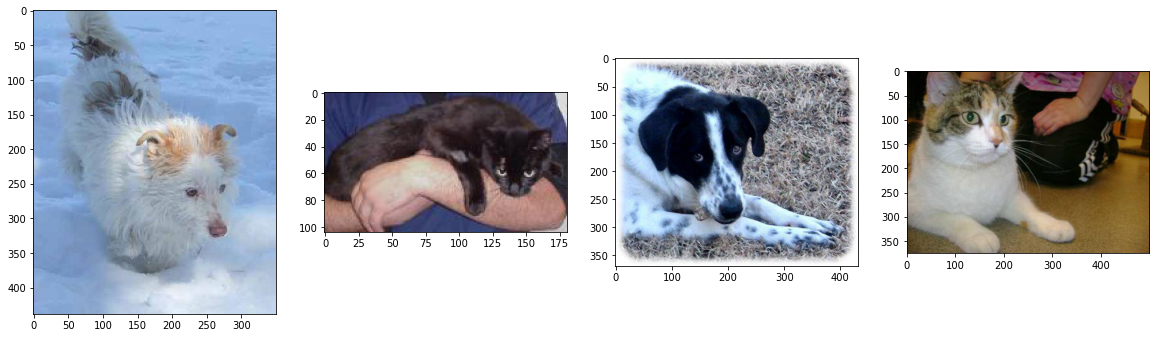

In [ ]:
img_ids = random.sample(range(0, len(files_df)), 4)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for i, img_idx in enumerate(img_ids):
  img_file = files_df.loc[img_idx]["file"]
  img = plt.imread(img_file)
  ax[i].imshow(img)


In [ ]:
files_df = shuffle(files_df)

In [ ]:
len(files_df[550:600].loc[files_df["label"]== "0"])

22

# Train a custom Convolutional Neural Network

In [ ]:
cnn_history = CNN().train_once(files_df)

## CNN train and test accuracy/loss

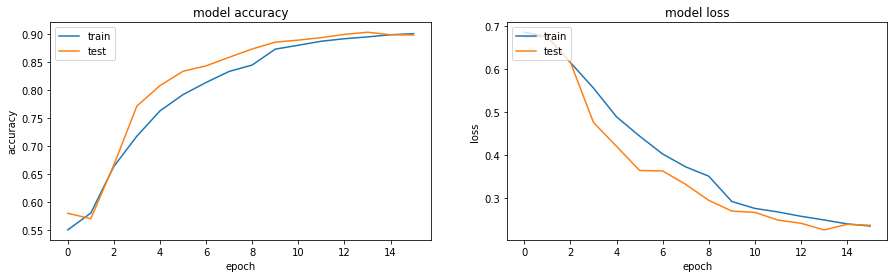

In [ ]:
plot_model_history(cnn_history)

# Train an AlexNet model

In [ ]:
alexnet_history = AlexNet().train_once(files_df)

Found 19928 validated image filenames belonging to 2 classes.
Found 4983 validated image filenames belonging to 2 classes.
Epoch 1/20
997/997 [==============================] - 83s 82ms/step - loss: 0.6800 - accuracy: 0.5591 - val_loss: 0.5893 - val_accuracy: 0.6930 - lr: 0.1000
Epoch 2/20
997/997 [==============================] - 78s 78ms/step - loss: 0.5803 - accuracy: 0.6966 - val_loss: 0.5721 - val_accuracy: 0.7120 - lr: 0.1000
Epoch 3/20
997/997 [==============================] - 79s 79ms/step - loss: 0.4853 - accuracy: 0.7676 - val_loss: 0.4730 - val_accuracy: 0.7748 - lr: 0.1000
Epoch 4/20
997/997 [==============================] - 79s 79ms/step - loss: 0.4141 - accuracy: 0.8091 - val_loss: 0.4148 - val_accuracy: 0.8122 - lr: 0.1000
Epoch 5/20
997/997 [==============================] - 78s 78ms/step - loss: 0.3514 - accuracy: 0.8456 - val_loss: 0.3695 - val_accuracy: 0.8332 - lr: 0.1000
Epoch 6/20
997/997 [==============================] - 80s 81ms/step - loss: 0.3087 - accurac

## AlexNet training and test accuracy/loss

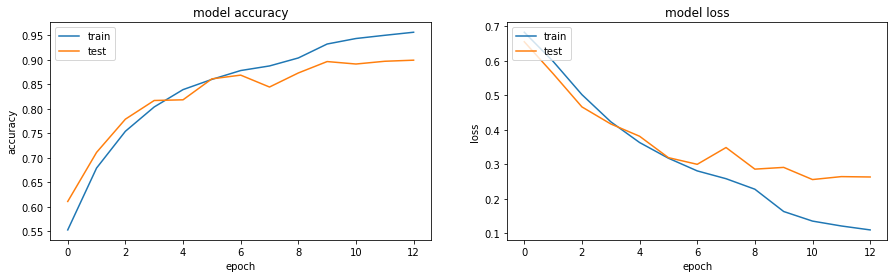

In [ ]:
plot_model_history(alexnet_history)

# Model selection

## Cross validation and model selection by zero-one loss score

### CNN CV

In [ ]:
cnn_histories, cnn_losses = CNN().cross_validate(files_df)

Fold #1
Found 19928 validated image filenames belonging to 2 classes.
Found 4983 validated image filenames belonging to 2 classes.
Epoch 1/20
623/623 [==============================] - 89s 141ms/step - loss: 0.6864 - accuracy: 0.5477 - val_loss: 0.6756 - val_accuracy: 0.5834 - lr: 0.1000
Epoch 2/20
623/623 [==============================] - 84s 135ms/step - loss: 0.6582 - accuracy: 0.6121 - val_loss: 0.6415 - val_accuracy: 0.6247 - lr: 0.1000
Epoch 3/20
623/623 [==============================] - 84s 135ms/step - loss: 0.5840 - accuracy: 0.6953 - val_loss: 0.5184 - val_accuracy: 0.7423 - lr: 0.1000
Epoch 4/20
623/623 [==============================] - 86s 138ms/step - loss: 0.5221 - accuracy: 0.7417 - val_loss: 0.4483 - val_accuracy: 0.7931 - lr: 0.1000
Epoch 5/20
623/623 [==============================] - 85s 137ms/step - loss: 0.4687 - accuracy: 0.7808 - val_loss: 0.4103 - val_accuracy: 0.8206 - lr: 0.1000
Epoch 6/20
623/623 [==============================] - 84s 135ms/step - loss: 0.

Fold #1
Found 19929 validated image filenames belonging to 2 classes.
Found 4982 validated image filenames belonging to 2 classes.
Epoch 1/20
623/623 [==============================] - 81s 129ms/step - loss: 0.6871 - accuracy: 0.5432 - val_loss: 0.6730 - val_accuracy: 0.5947 - lr: 0.1000
Epoch 2/20
623/623 [==============================] - 80s 128ms/step - loss: 0.6681 - accuracy: 0.5925 - val_loss: 0.6275 - val_accuracy: 0.6654 - lr: 0.1000
Epoch 3/20
623/623 [==============================] - 80s 128ms/step - loss: 0.6277 - accuracy: 0.6499 - val_loss: 0.5702 - val_accuracy: 0.7041 - lr: 0.1000
Epoch 4/20
623/623 [==============================] - 80s 128ms/step - loss: 0.5653 - accuracy: 0.7108 - val_loss: 0.4823 - val_accuracy: 0.7718 - lr: 0.1000
Epoch 5/20
623/623 [==============================] - 79s 127ms/step - loss: 0.4951 - accuracy: 0.7604 - val_loss: 0.4272 - val_accuracy: 0.8053 - lr: 0.1000
Epoch 6/20
623/623 [==============================] - 80s 128ms/step - loss: 0.

In [ ]:
np.mean(cnn_losses)

0.18125

### AlexNet CV

In [ ]:
histories, losses = AlexNet().cross_validate(files_df)

Fold #1
Found 19928 validated image filenames belonging to 2 classes.
Found 4983 validated image filenames belonging to 2 classes.
Epoch 1/20
623/623 [==============================] - 99s 157ms/step - loss: 0.6886 - accuracy: 0.5360 - val_loss: 0.6816 - val_accuracy: 0.5370 - lr: 0.1000
Epoch 2/20
623/623 [==============================] - 87s 140ms/step - loss: 0.6543 - accuracy: 0.6108 - val_loss: 0.7181 - val_accuracy: 0.5784 - lr: 0.1000
Epoch 3/20
623/623 [==============================] - 90s 145ms/step - loss: 0.5663 - accuracy: 0.7057 - val_loss: 0.5264 - val_accuracy: 0.7385 - lr: 0.1000
Epoch 4/20
623/623 [==============================] - 89s 143ms/step - loss: 0.4795 - accuracy: 0.7684 - val_loss: 0.4202 - val_accuracy: 0.8045 - lr: 0.1000
Epoch 5/20
623/623 [==============================] - 90s 145ms/step - loss: 0.4194 - accuracy: 0.8039 - val_loss: 0.4262 - val_accuracy: 0.8071 - lr: 0.1000
Epoch 6/20
623/623 [==============================] - 90s 144ms/step - loss: 0.

In [ ]:
np.mean(losses)

0.0875

## Visualizing the zero one losses to determine which model to select

NameError: ignored

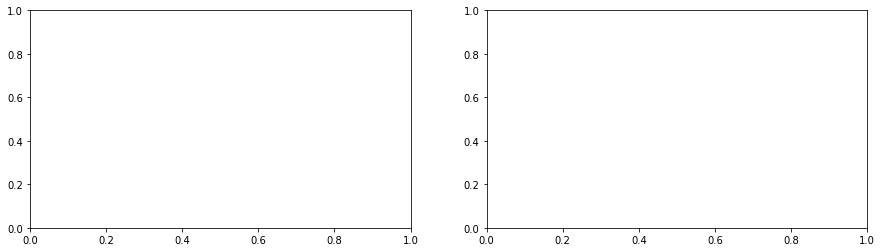

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.plot(losses)
ax1.axhline(np.mean(losses), linestyle="--", color="red")
ax1.set_title('AlexNet zero-one k-Fold CV loss')
ax1.set_ylabel('zero-one loss')
ax1.set_xlabel('k')

ax2.plot(cnn_losses)
ax2.set_title('CNN zero-one k-Fold CV loss')
ax2.axhline(np.mean(cnn_losses), linestyle="--", color="red")
ax2.set_ylabel('zero-one loss')
ax2.set_xlabel('k')

plt.show()

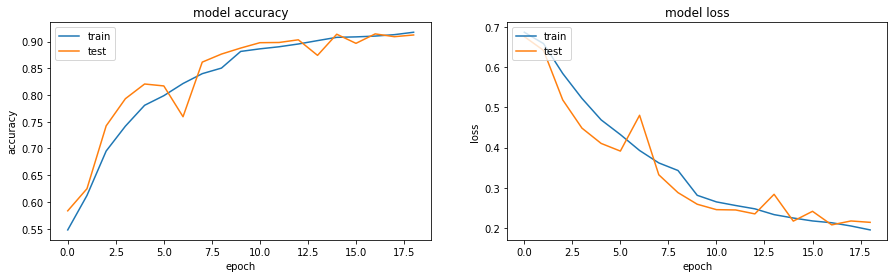

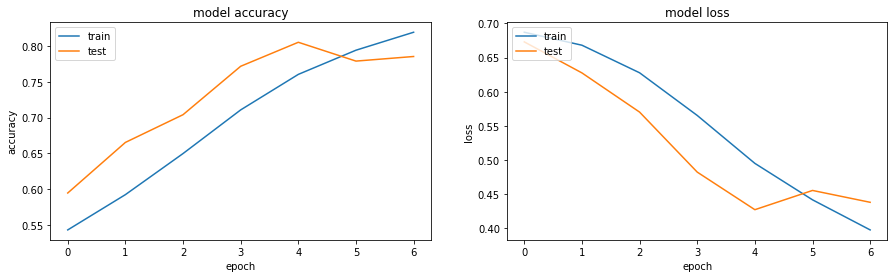

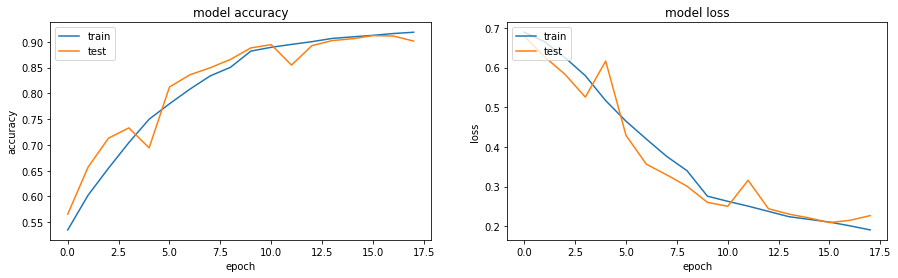

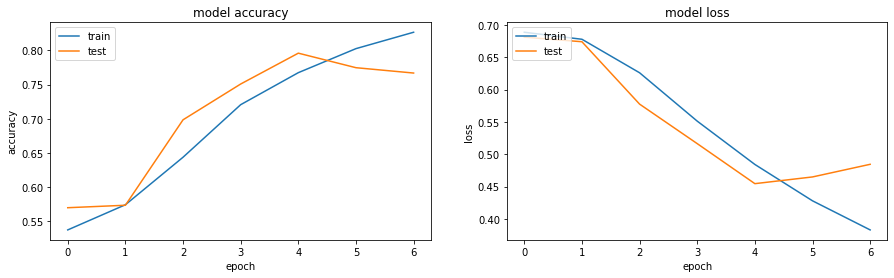

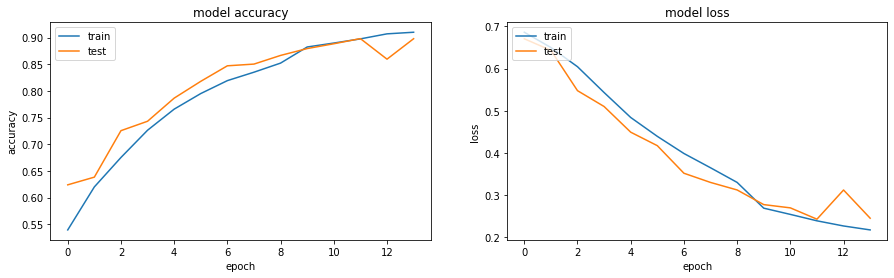

In [ ]:
for history in cnn_histories:
  plot_model_history(history)